<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/Part1_Encoder_Decode_keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://deeplizard.com/learn/video/lu7TCu7HeYc

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

In [2]:
# !apt install octave

In [3]:
# !apt-get update

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def datagen(n, seed=1234):
  np.random.seed(seed)
  t_begin=0.
  t_end=1.
  t_nsamples=50

  mu=-0.05
  lam=-1.
  t_space = np.linspace(t_begin, t_end, t_nsamples)

  data_list=[]
  for i in range(n):
    x_init = 2*np.random.rand(1)-1
    y_init = 2*np.random.rand(1)-1

    c1=x_init
    c2=y_init + (lam*x_init**2.)/(2.*mu-lam)
    c3=(-lam*x_init**2.)/(2.*mu-lam)
    c4=x_init**2.

    an_sol_x = lambda t : c1 * np.exp(mu*t)
    an_sol_y = lambda t : c2 * np.exp(lam*t) + c3 * np.exp(2*mu*t)
    an_sol_z = lambda t : c4 * np.exp(2*mu*t)

    x_an_sol = an_sol_x(t_space)
    y_an_sol = an_sol_y(t_space)
    z_an_sol = an_sol_z(t_space)
     
    

    temp_list=np.c_[t_space, x_an_sol,y_an_sol,z_an_sol]
    data_list.append(temp_list)
  return data_list

n=50
train=np.array(datagen(n, seed=234)).flatten().reshape(n*50,4)
n=10
valid=np.array(datagen(n, seed=9087)).flatten().reshape(n*50,4)
n=10
test=np.array(datagen(n, seed=3058)).flatten().reshape(n*50,4)
df=pd.DataFrame(valid, columns=['t','x','y','z'])

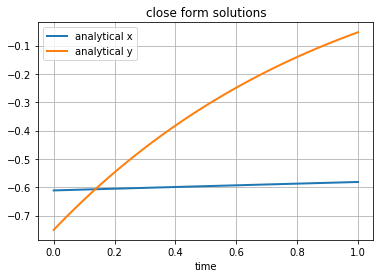

In [5]:
n=2
df1=df.iloc[50*n:50*(n+1),:]
plt.figure()
plt.plot(df1.t, df1.x, '-', linewidth=2, label='analytical x')
plt.plot(df1.t, df1.y, '-', linewidth=2, label='analytical y')
# plt.plot(df1.t, df1.z, '-', linewidth=2, label='analytical z')

plt.title('close form solutions')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

In [6]:
X_train=train[:,1:3]
Y_train=X_train
X_valid =valid[:,1:3]
Y_valid =X_valid
X_test =test[:,1:3]
Y_test =X_test

In [7]:
##Keras model

In [8]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model, Sequential
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from numpy import linalg as LA


In [9]:
X_train.shape,Y_train.shape, X_valid.shape,Y_valid.shape

((2500, 2), (2500, 2), (500, 2), (500, 2))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_dense1 (Dense)       (None, 10)                20        
                                                                 
 Hidden_dense2 (Dense)       (None, 10)                110       
                                                                 
 Hidden_dense3 (Dense)       (None, 5)                 55        
                                                                 
 Hidden_dense4 (Dense)       (None, 2)                 10        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


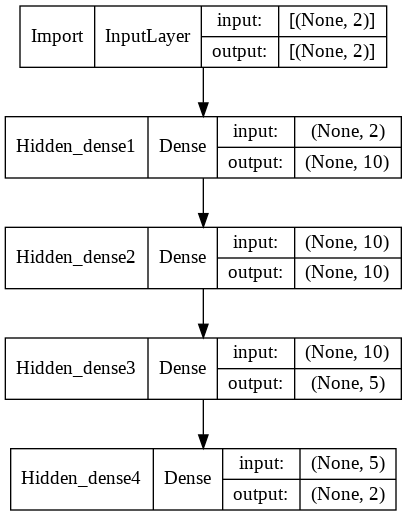

In [10]:
#over parametric model
input_size = 2
output_size1 = 10
output_size2 = 10
output_size3 = 5
output_size4 = 2

model = Sequential()
model.add(Input(shape=(input_size,), name='Import'))
model.add(Dense(output_size1, activation='linear', use_bias=False, name='Hidden_dense1'))
model.add(Dense(output_size2, activation='relu', use_bias=True, name='Hidden_dense2'))
model.add(Dense(output_size3, activation='relu', use_bias=True, name='Hidden_dense3'))
model.add(Dense(output_size4, activation='linear', use_bias=False, name='Hidden_dense4'))
# model.layers[-1].trainable = False

model.compile(optimizer="Adam", loss='mse')

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# mu = -0.05
# lam = -1
# b=lam/(lam-mu-mu**2)
# b=0.75
# model.layers[-1].set_weights([np.array([[1., 0.],
#        [0., 1],
#        [0., b],
#        [0., 0.],
#        [0., 0.]])])

In [11]:
model.get_weights()[-1]

array([[-0.64789, 0.12912],
       [-0.87913, 0.22892],
       [0.33877, -0.85931],
       [0.54684, 0.76294],
       [-0.53929, -0.53001]], dtype=float32)

In [12]:
epochs = 2000
batch_size = int(X_train.shape[0]/10)
print(batch_size)
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, Y_valid), shuffle=True)

250
Epoch 1/2000
10/10 [==============================] - 1s 33ms/step - loss: 0.2613 - val_loss: 0.1126
Epoch 2/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.2297 - val_loss: 0.1000
Epoch 3/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.2053 - val_loss: 0.0927
Epoch 4/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.1852 - val_loss: 0.0875
Epoch 5/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.1692 - val_loss: 0.0835
Epoch 6/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.1526 - val_loss: 0.0788
Epoch 7/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.1338 - val_loss: 0.0733
Epoch 8/2000
10/10 [==============================] - 0s 9ms/step - loss: 0.1124 - val_loss: 0.0680
Epoch 9/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.0914 - val_loss: 0.0631
Epoch 10/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.0728 - val_loss: 

In [13]:
model.get_weights()[-1]
#big bias

array([[-0.51495, 0.28611],
       [-0.68257, 0.37044],
       [0.54729, -0.79849],
       [0.6977, 0.85213],
       [-0.091297, -0.67833]], dtype=float32)

In [14]:
ynew = model.predict(X_valid)
ynew[0:10,:]

array([[-0.64404, -0.18549],
       [-0.64339, -0.17337],
       [-0.64273, -0.16151],
       [-0.64207, -0.14991],
       [-0.64142, -0.13857],
       [-0.64076, -0.12746],
       [-0.64011, -0.1166],
       [-0.63945, -0.10598],
       [-0.6388, -0.095598],
       [-0.63815, -0.085432]], dtype=float32)

In [15]:
Y_valid[0:10,:]

array([[-0.64402, -0.18552],
       [-0.64336, -0.1734],
       [-0.64271, -0.16155],
       [-0.64205, -0.14995],
       [-0.6414, -0.1386],
       [-0.64074, -0.1275],
       [-0.64009, -0.11664],
       [-0.63944, -0.10601],
       [-0.63878, -0.095618],
       [-0.63813, -0.085452]])

In [16]:
df_model=pd.DataFrame(np.c_[ynew,Y_valid], columns=['x1_model','x2_model','x1_true','x2_true'])
df_model

,x1_model,x2_model,x1_true,x2_true
0,-0.644044,-0.185488,-0.644019,-0.185520
1,-0.643386,-0.173370,-0.643362,-0.173402
2,-0.642729,-0.161514,-0.642706,-0.161546
3,-0.642073,-0.149914,-0.642051,-0.149947
4,-0.641417,-0.138566,-0.641396,-0.138599
...,...,...,...,...
495,-0.172698,-0.226131,-0.172692,-0.226148
496,-0.172522,-0.220961,-0.172515,-0.220978
497,-0.172346,-0.215896,-0.172339,-0.215913
498,-0.172169,-0.210935,-0.172164,-0.210952


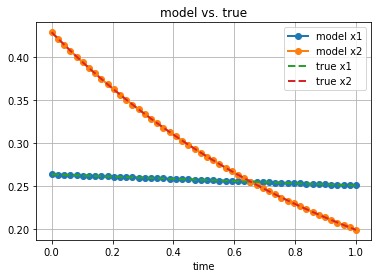

In [17]:
t_space = np.linspace(0, 1, 50)
n=6
plt.figure()
plt.plot(t_space, df_model.iloc[50*n:50*(n+1),0], '-o', linewidth=2, label='model x1')
plt.plot(t_space, df_model.iloc[50*n:50*(n+1),1], '-o', linewidth=2, label='model x2')

plt.plot(t_space, df_model.iloc[50*n:50*(n+1),2], '--', linewidth=2, label='true x1')
plt.plot(t_space, df_model.iloc[50*n:50*(n+1),3], '--', linewidth=2, label='true x2')

plt.title('model vs. true')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

In [18]:
ytest = model.predict(X_test)
ytest[0:10,:]

array([[-0.82328, 0.26795],
       [-0.82244, 0.27621],
       [-0.8216, 0.28428],
       [-0.82076, 0.29216],
       [-0.81992, 0.29985],
       [-0.81909, 0.30736],
       [-0.81825, 0.31469],
       [-0.81742, 0.32185],
       [-0.81658, 0.32883],
       [-0.81575, 0.33564]], dtype=float32)

In [19]:
df_test=pd.DataFrame(np.c_[ytest,Y_test], columns=['x1_model','x2_model','x1_true','x2_true'])
df_test

,x1_model,x2_model,x1_true,x2_true
0,-0.823276,0.267949,-0.823247,0.267932
1,-0.822437,0.276213,-0.822407,0.276197
2,-0.821598,0.284283,-0.821569,0.284267
3,-0.820760,0.292162,-0.820731,0.292146
4,-0.819923,0.299854,-0.819894,0.299837
...,...,...,...,...
495,-0.083302,0.285364,-0.083294,0.285376
496,-0.083218,0.279738,-0.083209,0.279751
497,-0.083133,0.274226,-0.083124,0.274239
498,-0.083049,0.268825,-0.083040,0.268839


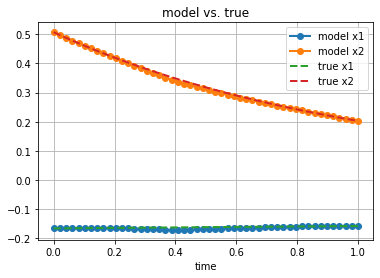

In [20]:
t_space = np.linspace(0, 1, 50)
n=6
plt.plot(t_space, df_test.iloc[50*n:50*(n+1),0], '-o', linewidth=2, label='model x1')
plt.plot(t_space, df_test.iloc[50*n:50*(n+1),1], '-o', linewidth=2, label='model x2')

plt.plot(t_space, df_test.iloc[50*n:50*(n+1),2], '--', linewidth=2, label='true x1')
plt.plot(t_space, df_test.iloc[50*n:50*(n+1),3], '--', linewidth=2, label='true x2')

plt.title('model vs. true')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()